# Awari - Data Science

## Projeto - Classificação

## 1. Considerações iniciais

Neste notebook vamos praticar a construção de um modelo de Machine Learning. Mais especificamente, iremos utilizar um algoritmo para realizar um processo de classificação. Propositalmente, evitaremos adentrar em algoritmos e explicações mais complexas, pois o foco é percorrer o fluxo do Aprendizado de Máquina por inteiro, ou o máximo dele.

### 1.1. O Problema de Negócio

A _churn rate_ (taxa de rotatividade ou cancelamento) é a porcentagem de assinantes de um serviço que interrompe suas assinaturas dentro de um determinado período de tempo. Para uma empresa expandir sua clientela, sua taxa de crescimento, medida pelo número de novos clientes, deve exceder sua taxa de cancelamento (_churn rate_).

Portanto, neste projeto, um banco deseja que você construa um modelo de Machine Learning que possa prever a probabilidade de seus clientes atuais fecharem suas contas em um futuro próximo e, portanto, calcular sua _churn rate_.

Esse é um problema de classificação no qual você classifica se um cliente irá sair (y=1) ou permanecer (y=0) com base diversos atributos.

### 1.2. Descrição do dados

No arquivo *Churn_Modelling.csv* você encontrará:
- **RowNumber**: id do registro/linha.
- **CustomerId**: identificador único do cliente.
- **Surname**: sobrenome do cliente.
- **CreditScore**: pontuação de crédito do cliente.
- **Geography**: país de origem do cliente.
- **Gender**: sexo do cliente.
- **Age**: idade do cliente.
- **Tenure**: número de anos em que o cliente está com o banco.
- **Balance**: saldo bancário.
- **NumOfProducts**: número de produtos que o cliente utiliza.
- **HasCrCard**: indica se o cliente tem (1) ou não tem (0) cartão de crédito.
- **IsActiveMember**: indica se o cliente é (1) ou não é (0) ativo no banco.
- **EstimatedSalary**: salário estimado em dólares.
- **Exited**: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi retido (0).


### 1.3 Métricas de Avaliação

Avalie seu modelo utilizando as métricas Acurácia e AUC (area under the ROC) estudadas nos módulos anteriores.

Trabalhe até conseguir uma acurácia acima e 85%.

## 2. Etapas do Projeto

Neste projeto você poderá seguir o fluxo que preferir, mas como sugestão pode seguir as seguintes etapas:
1. Análise exploratória 
2. Preparação e limpeza dos dados
3. Seleção de atributos
4. Construção do modelo
5. Avaliação do modelo
6. Otimização do modelo

Lembrando que esses passos, provavelmente, serão executados várias vezes até se obter um resultado satisfatório.

Sugestões de modelos:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Decision Tree Classification
* Random Forest Classification

Em caso de dúvidas, não esqueça de conversar com seu mentor.

## 3. Desenvolvimento do Projeto

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.offline as py
import plotly.graph_objs as go

In [ ]:
plotly.offline.init_notebook_mode(connected=True)

In [ ]:
dataframe = pd.read_csv('Churn_Modelling.csv')

In [ ]:
base = dataframe.copy()
base.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Solução do Projeto

### 1) Análise Exploratória dos Dados

- VERIFICANDO A TAXA DE PERMANÊNCIA/SAÍDA POR PAÍS

In [ ]:
total_pais = base[(base['Exited'] == 1) | (base['Exited'] == 0)].groupby(['Geography', 'Exited'])['RowNumber'].count()
total_pais

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: RowNumber, dtype: int64

In [ ]:
x = [total_pais.index[0][0], total_pais.index[2][0], total_pais.index[4][0]]
y1 = total_pais.values[[0, 2, 4]]
y2 = total_pais.values[[1, 3, 5]]

In [ ]:
data = [go.Bar(x=x, y=y1, name='Permanência'), go.Bar(x=x, y=y2, name='Cancelamento')]

configuracoes_layout = go.Layout(title='Relação Permanência x Cancelamento por País', 
                                 xaxis={'title': 'Países'}, 
                                 yaxis={'title': 'Qde. Clientes'})
fig = go.Figure(data=data, layout=configuracoes_layout)
py.iplot(fig, filename='Permanencia X Cancelamento')

In [ ]:
total = base.groupby('Geography')['RowNumber'].count()

In [ ]:
# Percentual de Cancelamento por país
percentual = (total_pais[[1, 3, 5]] / total) * 100
print(f'{percentual.index[0][0]}: {round(percentual[0], 1)} %')
print(f'{percentual.index[1][0]}: {round(percentual[1], 1)} %')
print(f'{percentual.index[2][0]}: {round(percentual[2], 1)} %')

France: 16.2 %
Germany: 32.4 %
Spain: 16.7 %


Vemos que nos 3 países há uma uma quantidade maior de clientes que ainda estão com a conta ativa em relação aos que sairam do banco. Na Alemanha é onde está relação é mais acentuada com aproximadamente 32.4% das contas encerradas (representando um total de 814 clientes a menos).
Na França é onde encontram-se o maior número de contas ativas com 4204 clientes enquanto 810 clientes optaram por encerrar suas contas (16.2%).

- VERIFICANDO A TAXA DE PERMANÊNCIA/SAÍDA POR SEXO

In [ ]:
genero = base[(base['Exited'] == 0) | (base['Exited'] == 1)].groupby(['Geography', 'Gender'])['RowNumber'].count()
genero

Geography  Gender
France     Female    2261
           Male      2753
Germany    Female    1193
           Male      1316
Spain      Female    1089
           Male      1388
Name: RowNumber, dtype: int64

In [ ]:
x = [genero.index[1][0], genero.index[2][0], genero.index[4][0]]
y2 = genero.values[[0, 2, 4]]
y1 = genero.values[[1, 3, 5]]

In [ ]:
data = [go.Bar(x=x, y=y1, name='Masculino'), go.Bar(x=x, y=y2, name='Feminino')]

configuracoes_layout = go.Layout(title='Relação Permanência x Cancelamento por Gênero', 
                                 xaxis={'title': 'Países'}, 
                                 yaxis={'title': 'Qde. Clientes'})
fig = go.Figure(data=data, layout=configuracoes_layout)
py.iplot(fig, filename='Permanencia X Cancelamento por Gênero')

In [ ]:
genero2 = base[(base['Exited'] == 0) | (base['Exited'] == 1)].groupby(['Geography', 'Gender', 'Exited'])['RowNumber'].count()
genero2

Geography  Gender  Exited
France     Female  0         1801
                   1          460
           Male    0         2403
                   1          350
Germany    Female  0          745
                   1          448
           Male    0          950
                   1          366
Spain      Female  0          858
                   1          231
           Male    0         1206
                   1          182
Name: RowNumber, dtype: int64

In [ ]:
x = [genero2.index[0][0], genero2.index[4][0], genero2.index[8][0]]
y1 = genero2.values[[0, 4, 8]] # Número de mulheres que mantiveram a conta para os 3 países
y2 = genero2.values[[1, 5, 9]] # Número de mulheres que encerraram a conta para os 3 países

In [ ]:
data = [go.Bar(x=x, y=y1, name='Contas Ativas'), go.Bar(x=x, y=y2, name='Contas Canceladas')]

configuracoes_layout = go.Layout(title='Relação Permanência x Cancelamento para as Mulheres', 
                                 xaxis={'title': 'Países'}, 
                                 yaxis={'title': 'Qde. Mulheres'})
fig = go.Figure(data=data, layout=configuracoes_layout)
py.iplot(fig, filename='Permanencia X Cancelamento para mulheres')

In [ ]:
total_mulheres = y1 + y2 # Número total de mulheres para cada país
percent = (y2 / total_mulheres) * 100
for num, pais in zip(percent, x):
    num = round(num, 1)
    print(f'Cancelamento de {num}% das mulheres na {pais}.')

Cancelamento de 20.3% das mulheres na France.
Cancelamento de 37.6% das mulheres na Germany.
Cancelamento de 21.2% das mulheres na Spain.


Com relação ao gênero dos clientes não apresentam discrepâncias fora do comum. Nos 3 países há uma quantidade maior de homens com contas ativas mas não chegando a ser uma diferença tão significativa. As mulheres correntistas apresentam uma quantidade bem maior do que as que cancelaram suas contas.

- VERIFICANDO A RELAÇÃO ENTRE O SALDO BANCÁRIO E A PERMANÊNCIA/CANCELAMENTO DA CONTA

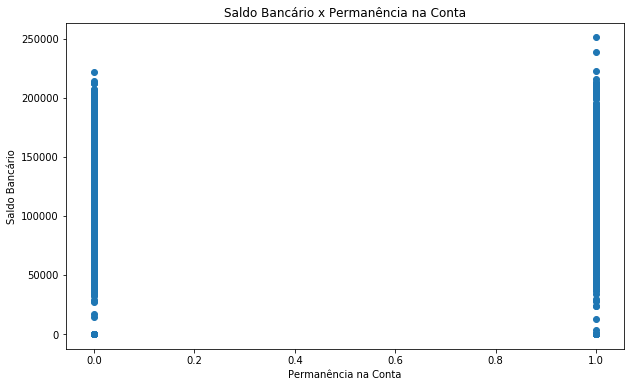

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.xlabel('Permanência na Conta')
plt.ylabel('Saldo Bancário')
plt.title('Saldo Bancário x Permanência na Conta')
plt.scatter(base['Exited'], base['Balance'])
plt.show(fig)

In [ ]:
corr = base['Balance'].corr(base['Exited'])
print(f'Correlação entre as variáveis Saldo e Permanência: {corr}.')
print('Ou seja, a relação entre as duas variáveis é desprezivel e portanto não há ligação direta entre ambas.')

Correlação entre as variáveis Saldo e Permanência: 0.1185327687716338.
Ou seja, a relação entre as duas variáveis é desprezivel e portanto não há ligação direta entre ambas.


- VERIFICANDO A RELAÇÃO ENTRE O SALÁRIO ESTIMADO E A PERMANÊNCIA/CANCELAMENTO DA CONTA

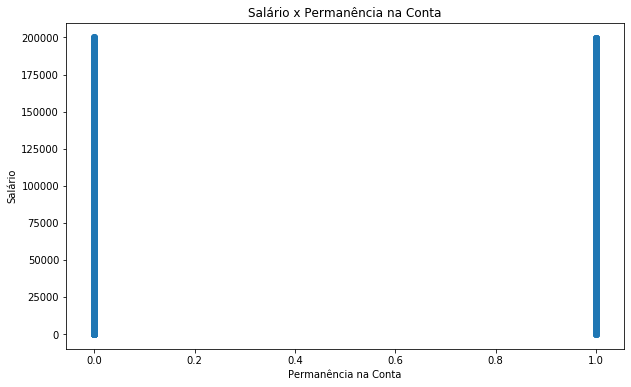

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.xlabel('Permanência na Conta')
plt.ylabel('Salário')
plt.title('Salário x Permanência na Conta')
plt.scatter(base['Exited'], base['EstimatedSalary'])
plt.show(fig)

Novamente, não existe relação nenhuma do salário previsto do cliente e a situação de manter ou não a respectiva conta.

In [ ]:
base.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


Vendo a tabela acima, temos informaçãoes sobre a correlação entre as variáveis duas a duas. Em suma, nenhuma delas tem uma correlação forte entre si ou com a classe que informa sobre o cancelamento ou não da conta e por isso podemos desprezar qualquer relação direta entre esses atributos e a possibilidade desta ser o motivo do cancelamento.

### 2) Preparação e limpeza dos dados

In [ ]:
# Verificando informações iniciais dos dados
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Verificando se há valores nulos
base.isnull().sum()
# Não há valores nulos

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
lista = ['Geography', 'Gender']
for valor in lista:
    x = base[valor].unique()
    print(x)

['France' 'Spain' 'Germany']
['Female' 'Male']


Aparentemente não há nem valores nulos e nem dados inconsistentes na base de dados.

### 3) Seleção dos atributos

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

1) Iremos agora selecionar os atributos que usaremos para posteriormente aplicarmos algorítmos de machine learning. Note que não iremos utilizar as colunas RowNumber, CustomerId e Surname uma vez que elas não geram nenhum padrão e portanto são despreziveis para nossa análise.

2) Iremos ainda dividir a base de dados entre: base de treino e de teste para que possamos futuramente treinar o algorítmo e testá-lo para verificar a sua eficiência.

3) Note ainda que faremos um tratamento especial nos atributos categóricos Geography e Gender. Como, em geral, algorítmos de ML utlizam-se de aparatos matemáticos iremos transformar estes atributos, que originalmente são strings para um formato numérico. 

#### 3.1) Separação da base de dados

Primeiramente, iremos separar a base em duas partes: uma referente aos atributos previsores e outra referente à classe que queremos prever. 

In [ ]:
previsores = base.loc[:, 'CreditScore': 'EstimatedSalary'].values
classe = base.iloc[:, 13:14].values
previsores

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
classe

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

#### 3.2) Transformação das variáveis categóricas

Neste passo precisamos converter as variáveis categóricas em variáveis numéricas uma vez que o algorítmo pode não conseguir atuar devido a quantidade de contas e cálculos que ele fará. Neste caso, para convertermos tais dados em números usamos o comando abaixo:

In [ ]:
labelencoder_previsores = LabelEncoder()

In [ ]:
previsores[:,1] = labelencoder_previsores.fit_transform(previsores[:,1])
previsores[:,2] = labelencoder_previsores.fit_transform(previsores[:,2])

In [ ]:
previsores

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
classe

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

Note que no atributo Gender teremos: Female = 0; Male = 1.
Enquanto no atributo Geography encontramos: France = 0 , Spain = 2, Germany = 1.

#### 3.3) Tratando os pesos das variáveis categóricas

Temos agora que as variáveis categoricas receberam números entre 0 e 2. Mas note que ao fazer contas usando tais números, os atributos com numero 0 não terão influência no resultado final, assim como o atributo com o numero 2 terá o dobro de importância em relação ao atributo 1. Neste caso, para dar um peso igual para todos eles usaremos o comando OneHotEncoder.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
onehotencoder = OneHotEncoder(categorical_features=[1,2])
previsores = onehotencoder.fit_transform(previsores).toarray()

C:\Users\mjuni\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.

C:\Users\mjuni\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning:

The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.



In [ ]:
previsores.shape

(10000, 13)

#### 3.4) Escalonando os atributos

Aqui iremos colocar os atributos todos na mesma escala.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)
previsores

array([[ 0.99720391, -0.57873591, -0.57380915, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.00280393, -0.57873591,  1.74273971, ..., -1.54776799,
         0.97024255,  0.21653375],
       [ 0.99720391, -0.57873591, -0.57380915, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.99720391, -0.57873591, -0.57380915, ..., -1.54776799,
         0.97024255, -1.00864308],
       [-1.00280393,  1.72790383, -0.57380915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 0.99720391, -0.57873591, -0.57380915, ...,  0.64609167,
        -1.03067011, -1.07636976]])

#### 3.5) Divisão da base de dados

Iremos agora dividir a base de dados em duas: uma parte para fazermos o treinamento do algorítmo e a outra para fazer o teste.

In [ ]:
# Divisão da base de dados entre base de treino e de teste
prev_treino, prev_teste, cls_treino, cls_teste = train_test_split(previsores, classe, test_size=0.3, random_state=0)

In [ ]:
print(prev_treino.shape)
print(prev_teste.shape)

(7000, 13)
(3000, 13)


In [ ]:
print(cls_treino.shape)
print(cls_teste.shape)

(7000, 1)
(3000, 1)


### 4) Construção do Modelo

De posse dos dados obtidos nos passos anteriores, iremos agora fazer o treinamento destes dados usando algorítmos de aprendizagem de máquinas. Inicialmente iremos usar o algorítimo Naive Bayes que é um classificador baseado na propabilidade de um novo registro acontencer.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
classificador = GaussianNB()

In [ ]:
classificador.fit(prev_treino, cls_treino)

C:\Users\mjuni\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
previsoes = classificador.predict(prev_teste)
print(previsoes)

[0 0 0 ... 0 0 1]


### 5) Avaliação do Modelo

Faremos agora uma avaliação do modelo escolhido no item anterior. Veremos a quantidade de acertos do mesmo bem como seu percentual de eficiência.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_score

In [ ]:
precisao = accuracy_score(cls_teste, previsoes)
matrix = confusion_matrix(cls_teste, previsoes)

In [ ]:
print(f'A precisão deste modelo é de {round(precisao * 100,1)}%')
print('A matriz de confusão do modelo será:')
print(matrix)

A precisão deste modelo é de 80.5%
A matriz de confusão do modelo será:
[[2164  215]
 [ 371  250]]


Resultado: 
Da matriz de confusão, vemos que há 2164 + 250 = 2414 registros classificados corretamente, equanto que os outros 586 foram classificados incorretamente, resultando em 80.5% de acerto.

#### 5.1) Usando a métrica AUC 

Usaremos outra métrica para verificar a eficiência do modelo. Trata-se da AUC, que avalia com base na área abaixo da curva. Temos entao:

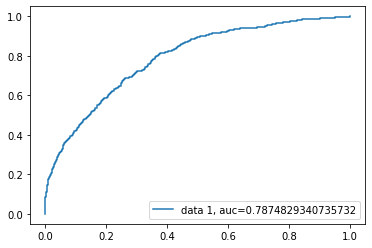

In [ ]:
y_pred_probability = classificador.predict_proba(prev_teste)[::,1]
fpr, tpr, _ = roc_curve(cls_teste,  y_pred_probability)
auc = roc_auc_score(cls_teste, y_pred_probability)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Resultado: Plotando o gráfico deste resultado, notamos que obtivemos um percentual de precisão de 78.7%, representando uma acurácia menor em relação ao método anterior.

### 6) Otimização do Modelo

Iremos agora tentar fazer uma otimização do modelo obtido anteriormente, e para isso vamos escolher outro algorítmo de classificação. Para isso, utilizaremos o Random Forest como mesmos pré-processamentos realizados no modelo anterior.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classificador = RandomForestClassifier(n_estimators=55, criterion='entropy', random_state=0)

In [ ]:
classificador.fit(prev_treino, cls_treino)

C:\Users\mjuni\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=55,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
previsoes2 = classificador.predict(prev_teste)

In [ ]:
precisao2 = accuracy_score(cls_teste, previsoes2)
matrix2 = confusion_matrix(cls_teste, previsoes2)

In [ ]:
print(f'A precisão deste modelo é de {round(precisao2 * 100,1)}%')
print('A matriz de confusão do modelo será:')
print(matrix2)

A precisão deste modelo é de 86.6%
A matriz de confusão do modelo será:
[[2285   94]
 [ 307  314]]


Resultado: 
Da matriz de confusão, vemos que há 2285 + 314 = 2599  registros classificados corretamente, equanto que os outros 401 foram classificados incorretamente, resultando em 86.6% de acerto.

#### 6.1) Usando a métrica AUC 

Iremos novamente testar a métrica AUC para ter certeza da coerência do resultado obtido anteriormente.

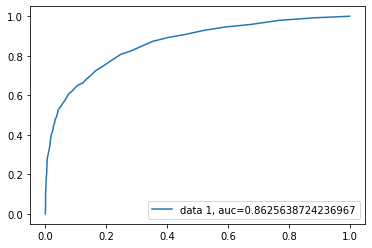

In [ ]:
y_pred_probability = classificador.predict_proba(prev_teste)[::,1]
fpr, tpr, _ = roc_curve(cls_teste,  y_pred_probability)
auc = roc_auc_score(cls_teste, y_pred_probability)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Resultado: 
Assim como no caso do modelo Naive Bayes, ao utilizar a métrica AUC ela retorna um percentual de acerto menor em relação à metriz de confusao. Neste modelo, o percentual de acerto por esta métrica representa 86.3%.

Conclusão: O modelo Random Forest apresentou melhor resultado em relação ao Naive Bayes e ficou acima dos 85% exigidos pelo projeto.

## 4. Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira iteração de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. Você pode remover variáveis/atributos menos importantes, normalizar variáveis importantes, escolher outros algoritmos de aprendizagem supervisionada, etc. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.

### Awari -  <a href="https://awari.com.br/"> awari.com.br</a>